# Bharat Intern
# Task-1
Stock Prediction using LSTM.

In [63]:
import pandas as pd
import tensorflow as tf 

In [64]:
df=pd.read_csv('NSE-TATAGLOBAL11.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [65]:
df.shape

(1235, 8)

In [66]:
df1=df.reset_index()['Close']

In [67]:
df1.head()

0    215.15
1    209.20
2    218.20
3    227.60
4    230.90
Name: Close, dtype: float64

In [68]:
df1.shape

(1235,)

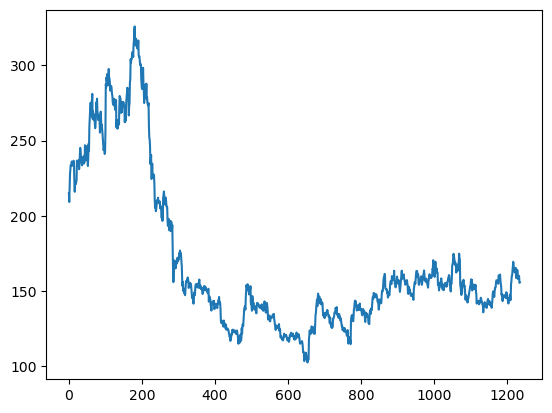

In [69]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [70]:
import numpy as np

In [71]:
df1

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

In [72]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler(feature_range=(0,1))
df1=Scaler.fit_transform(np.array(df1).reshape(-1,1))

In [73]:
df1

array([[0.50425818],
       [0.47758853],
       [0.51792918],
       ...,
       [0.25773196],
       [0.2371134 ],
       [0.23823398]])

#Train Test split is Done using cross Validiation or Random seed


In [74]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [75]:
training_size,test_size

(802, 433)

In [76]:
#preprocessing to check time  steps
import numpy
#convert an array of Values into a a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i +  time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [77]:
time_step=100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [78]:
print(X_train.shape), print(Y_train.shape)

(701, 100)
(701,)


(None, None)

In [79]:
print(X_test.shape), print(Y_test.shape)

(332, 100)
(332,)


(None, None)

In [80]:
#3d
# reshape input to be (samples, time steps,features) which is required forLSTM
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [81]:
#### Create LSTM model ####
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [82]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer='adam')

In [83]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [84]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=10,batch_size=64,verbose=1)

Epoch 1/10
11/11 [==============================] - 10s 378ms/step - loss: 0.0691 - val_loss: 0.0090
Epoch 2/10
11/11 [==============================] - 2s 218ms/step - loss: 0.0110 - val_loss: 0.0011
Epoch 3/10
11/11 [==============================] - 2s 222ms/step - loss: 0.0044 - val_loss: 0.0033
Epoch 4/10
11/11 [==============================] - 2s 219ms/step - loss: 0.0041 - val_loss: 0.0011
Epoch 5/10
11/11 [==============================] - 2s 220ms/step - loss: 0.0029 - val_loss: 8.8447e-04
Epoch 6/10
11/11 [==============================] - 2s 221ms/step - loss: 0.0028 - val_loss: 8.7047e-04
Epoch 7/10
11/11 [==============================] - 3s 266ms/step - loss: 0.0025 - val_loss: 0.0011
Epoch 8/10
11/11 [==============================] - 3s 244ms/step - loss: 0.0023 - val_loss: 0.0013
Epoch 9/10
11/11 [==============================] - 2s 222ms/step - loss: 0.0023 - val_loss: 9.7642e-04
Epoch 10/10
11/11 [==============================] - 2s 221ms/step - loss: 0.0022 - val

In [90]:

tf.__version__

'2.12.0'

In [91]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 50ms/step


In [94]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [95]:
#### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(Y_train,train_predict))

0.04577470753502379

In [98]:
#### Test Data RSME 
math.sqrt(mean_squared_error(Y_test,test_predict))

0.030751242780732272

In [99]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :]=np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

In [100]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :]=np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

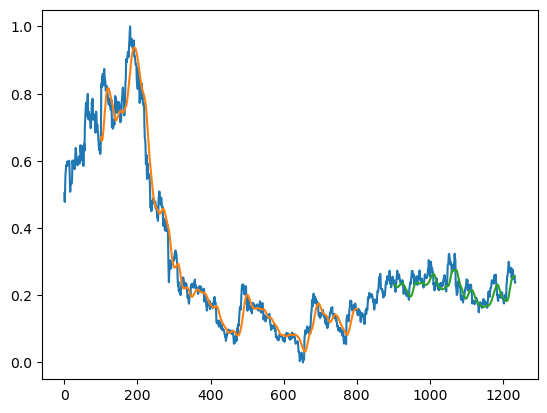

In [101]:
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [111]:
len(test_data)

433

In [145]:
x_input=test_data[333:].reshape(1,-1)
x_input.shape

(1, 100)

In [146]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [147]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1, -1)
        x_input=x_input.reshape((1, n_steps, 1))
        #print inputs
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)           

[0.25152275]
101
1 day input [0.16651726 0.17279247 0.17951591 0.17637831 0.17234424 0.16898252
 0.16831017 0.16248319 0.16987898 0.17525773 0.18556701 0.18915285
 0.18354998 0.1824294  0.17256835 0.18108472 0.18153294 0.17055132
 0.17189601 0.16943075 0.17705065 0.16270731 0.17346481 0.18646347
 0.20416853 0.21156432 0.20259973 0.20461676 0.19520394 0.20797848
 0.22142537 0.22142537 0.22523532 0.23890632 0.2447333  0.24406096
 0.24137158 0.24271627 0.24069924 0.23442403 0.25930076 0.25907665
 0.25616316 0.24831914 0.26176602 0.2447333  0.23330345 0.22613178
 0.20103093 0.20416853 0.18870462 0.18287763 0.19049753 0.19766921
 0.19878978 0.20080681 0.19744509 0.19520394 0.19722098 0.19229045
 0.19789332 0.20909906 0.20730614 0.20170327 0.19004931 0.19206634
 0.17817122 0.17548185 0.18377409 0.19139399 0.18780816 0.20192739
 0.18511878 0.18668758 0.23263111 0.2415957  0.25750784 0.25862842
 0.27297176 0.29112506 0.29964142 0.29157329 0.27498879 0.27947109
 0.26781712 0.27162707 0.27431645

In [148]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [149]:
import matplotlib.pyplot as plt


In [150]:
len(df1)-100

1135

In [155]:
print(len(df1))

1235


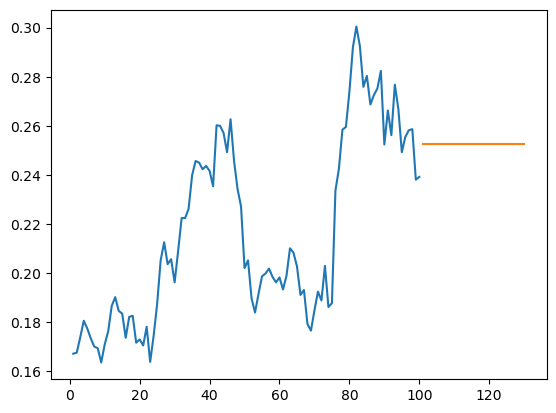

In [178]:
plt.plot(day_new,scaler.inverse_transform(df1[1135:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

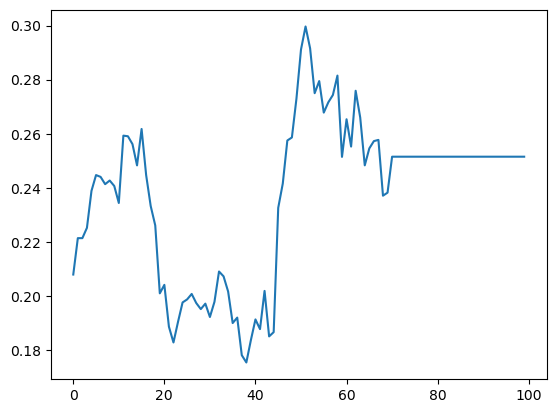

In [186]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1165:])

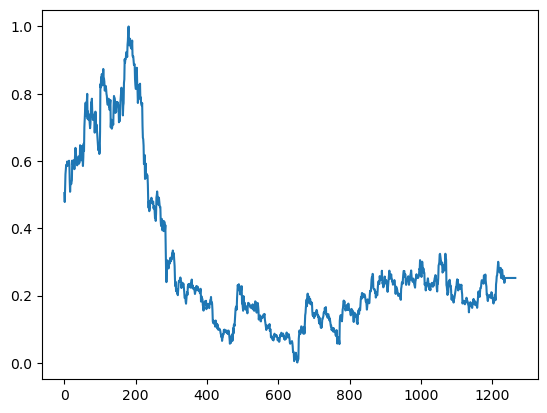

In [188]:
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)

# THIS WAY WE CAN PRECIDT THE STOCKS